Name: I-Ting Yu, Github: eatingyu0820, USC ID: 5350526235 

# HW5 - Decision Trees & Lasso Regression 

 ### 1. Decision Trees as Interpretable Models
 (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations
<br> http://webgraphviz.com/

(b) Build a decision tree on the whole data set and plot it.

In [1]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.model_selection import GridSearchCV

In [5]:
path = '../data/diagnosis.data'
colName = ['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis']
d = {'no': 0, 'yes': 1}
df1 = pd.read_csv(path, encoding='utf-16', decimal=',', sep='\t', names=colName)
# change 'yes' & 'no' to int value 0 and 1 in order to train the decisiontreeclassifier - needs all type to be the same
df1 = df1.replace(d)

#split dataset in features and target variable
X = df1.iloc[:,:-2] # Features
y = df1.iloc[:,-2:] # Decision(Target) variables

[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

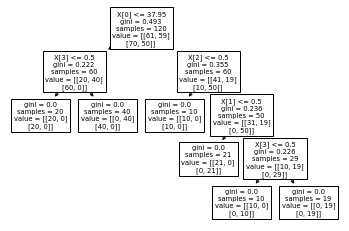

In [6]:
# https://www.datacamp.com/tutorial/decision-tree-classification-python
# Build a decision tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X, y)
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# Visual the decision tree 
tree.plot_tree(clf)

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# dotfile_1b = open("1b_decisionTree.dot",'w')
# tree.export_graphviz(clf, out_file=dotfile_1b)
# dotfile_1b.close()
# tree.export_graphviz(clf)

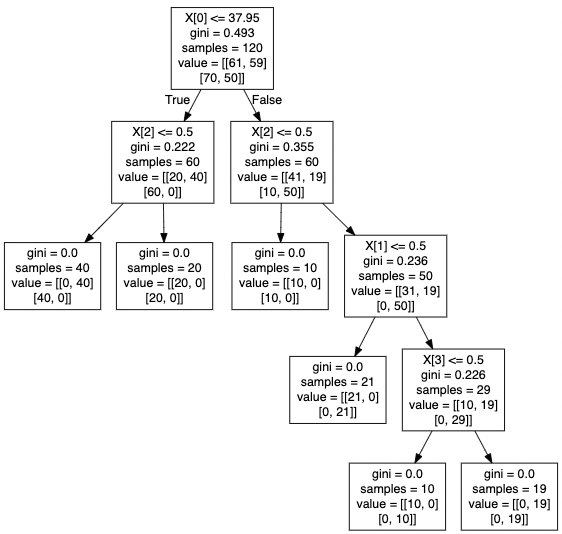

(c) Convert the decision rules into a set of IF-THEN rules.
https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

In [7]:
# Representing the Model as a Function
def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = clf.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [8]:
tree_to_code(df1, list(colName))

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Bladder, Pelvis):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

Ccp_alphas: [0.         0.04908333 0.07947222 0.11111111 0.20423611]
Impurities: [0.         0.09816667 0.17763889 0.28875    0.49298611]
Best alpha: 0.0


[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

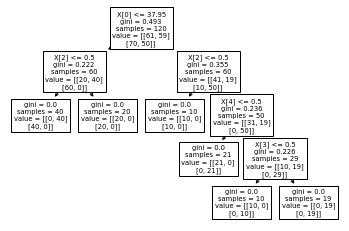

In [9]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
# https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/#:~:text=Minimal%20Cost%2DComplexity%20Pruning%20is,known%20as%20the%20complexity%20parameter.&text=where%20%7CT%7C%20is%20the%20number,rate%20of%20the%20terminal%20nodes.
# cost_complexity_pruning_path gives the effective alphas of subtrees during pruning and also the corresponding impurities.
# Can use these values of alpha to prune our decision tree
path = clf.cost_complexity_pruning_path(X,y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('Ccp_alphas:', ccp_alphas)
print('Impurities:', impurities)
parameters = {}
alphas = path['ccp_alphas'].tolist() # convert nparray to list
parameters['ccp_alpha'] = alphas     # add it into dict
# param_grid must be dict and need lists of parameter
clf = DecisionTreeClassifier()
gridCV = GridSearchCV(clf, param_grid = parameters)
gridCV = gridCV.fit(X,y)

bestClassTree = gridCV.best_params_
print('Best alpha:', bestClassTree['ccp_alpha'])
minimalDT = DecisionTreeClassifier(ccp_alpha = bestClassTree['ccp_alpha'])
minimalDT = minimalDT.fit(X,y)
tree.plot_tree(minimalDT)

# dotfile_1d = open("1d_minDecisionTree.dot",'w')
# tree.export_graphviz(minimalDT, out_file=dotfile_1d)
# dotfile_1d.close()

# tree.export_graphviz(minimalDT)

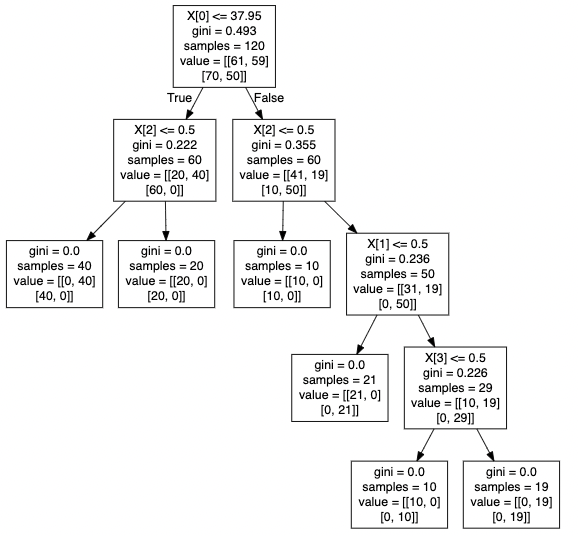

### 2. The LASSO and Boosting for Regression

In [10]:
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

(a) Download the Communities and Crime data3 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. <br>Use the first 1495 rows of data as the training set and the rest as the test set.

(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [11]:
path = '../data/communities.data'
df = pd.read_csv(path, na_values=['?'],header = None)
# drop nonpredictive features
df2=df.drop([0,1,2,3,4], axis=1)
# add mean to the missing values
df2 = df2.fillna(df2.mean())

# Use the first 1495 rows of data as the training set 
# and the rest as the test set.
X = df2.iloc[0:1495,]
y= df2.iloc[1496:,]
df2

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


(c) Plot a correlation matrix for the features in the data set.

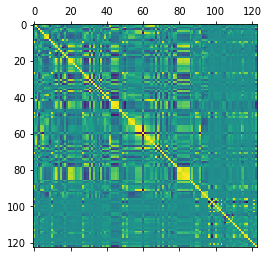

In [12]:
# plt.matshow() - Display an array as a matrix in a new figure window.
plt.matshow(df2.corr())
plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean.

In [13]:
# axis = 0 -> column / axis = 1 -> row
df2_mean = df2.mean(axis=0)
df2_std = df2.std(axis=0)
cv = df2_std/df2_mean
print('Coefficient of Variation CV for each feature')
cv

Coefficient of Variation CV for each feature


5      2.203503
6      0.353298
7      1.410920
8      0.323782
9      1.359162
         ...   
123    0.122331
124    0.368040
125    2.555266
126    0.337281
127    0.979015
Length: 123, dtype: float64

(e) Pick ⌊√128⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [14]:
# sort the CV from highest to lowest
cv_sort = cv.sort_values(ascending=False)
print("Sorted descending CV of all the coloumns:")
print(cv_sort)
# get the top 11 CV
highest11CV = cv_sort[:int(math.sqrt(128))]
print("\nSelected 11 Coloumns: ")
# print(highest11CV.index)
selcol = highest11CV.index.tolist()
print(selcol)
df2[highest11CV.index]

Sorted descending CV of all the coloumns:
95     4.407702
94     3.485481
54     2.994196
56     2.900497
125    2.555266
         ...   
116    0.145956
109    0.131417
123    0.122331
110    0.121659
103    0.057126
Length: 123, dtype: float64

Selected 11 Coloumns: 
[95, 94, 54, 56, 125, 32, 5, 15, 76, 118, 10]


,95,94,54,56,125,32,5,15,76,118,10
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


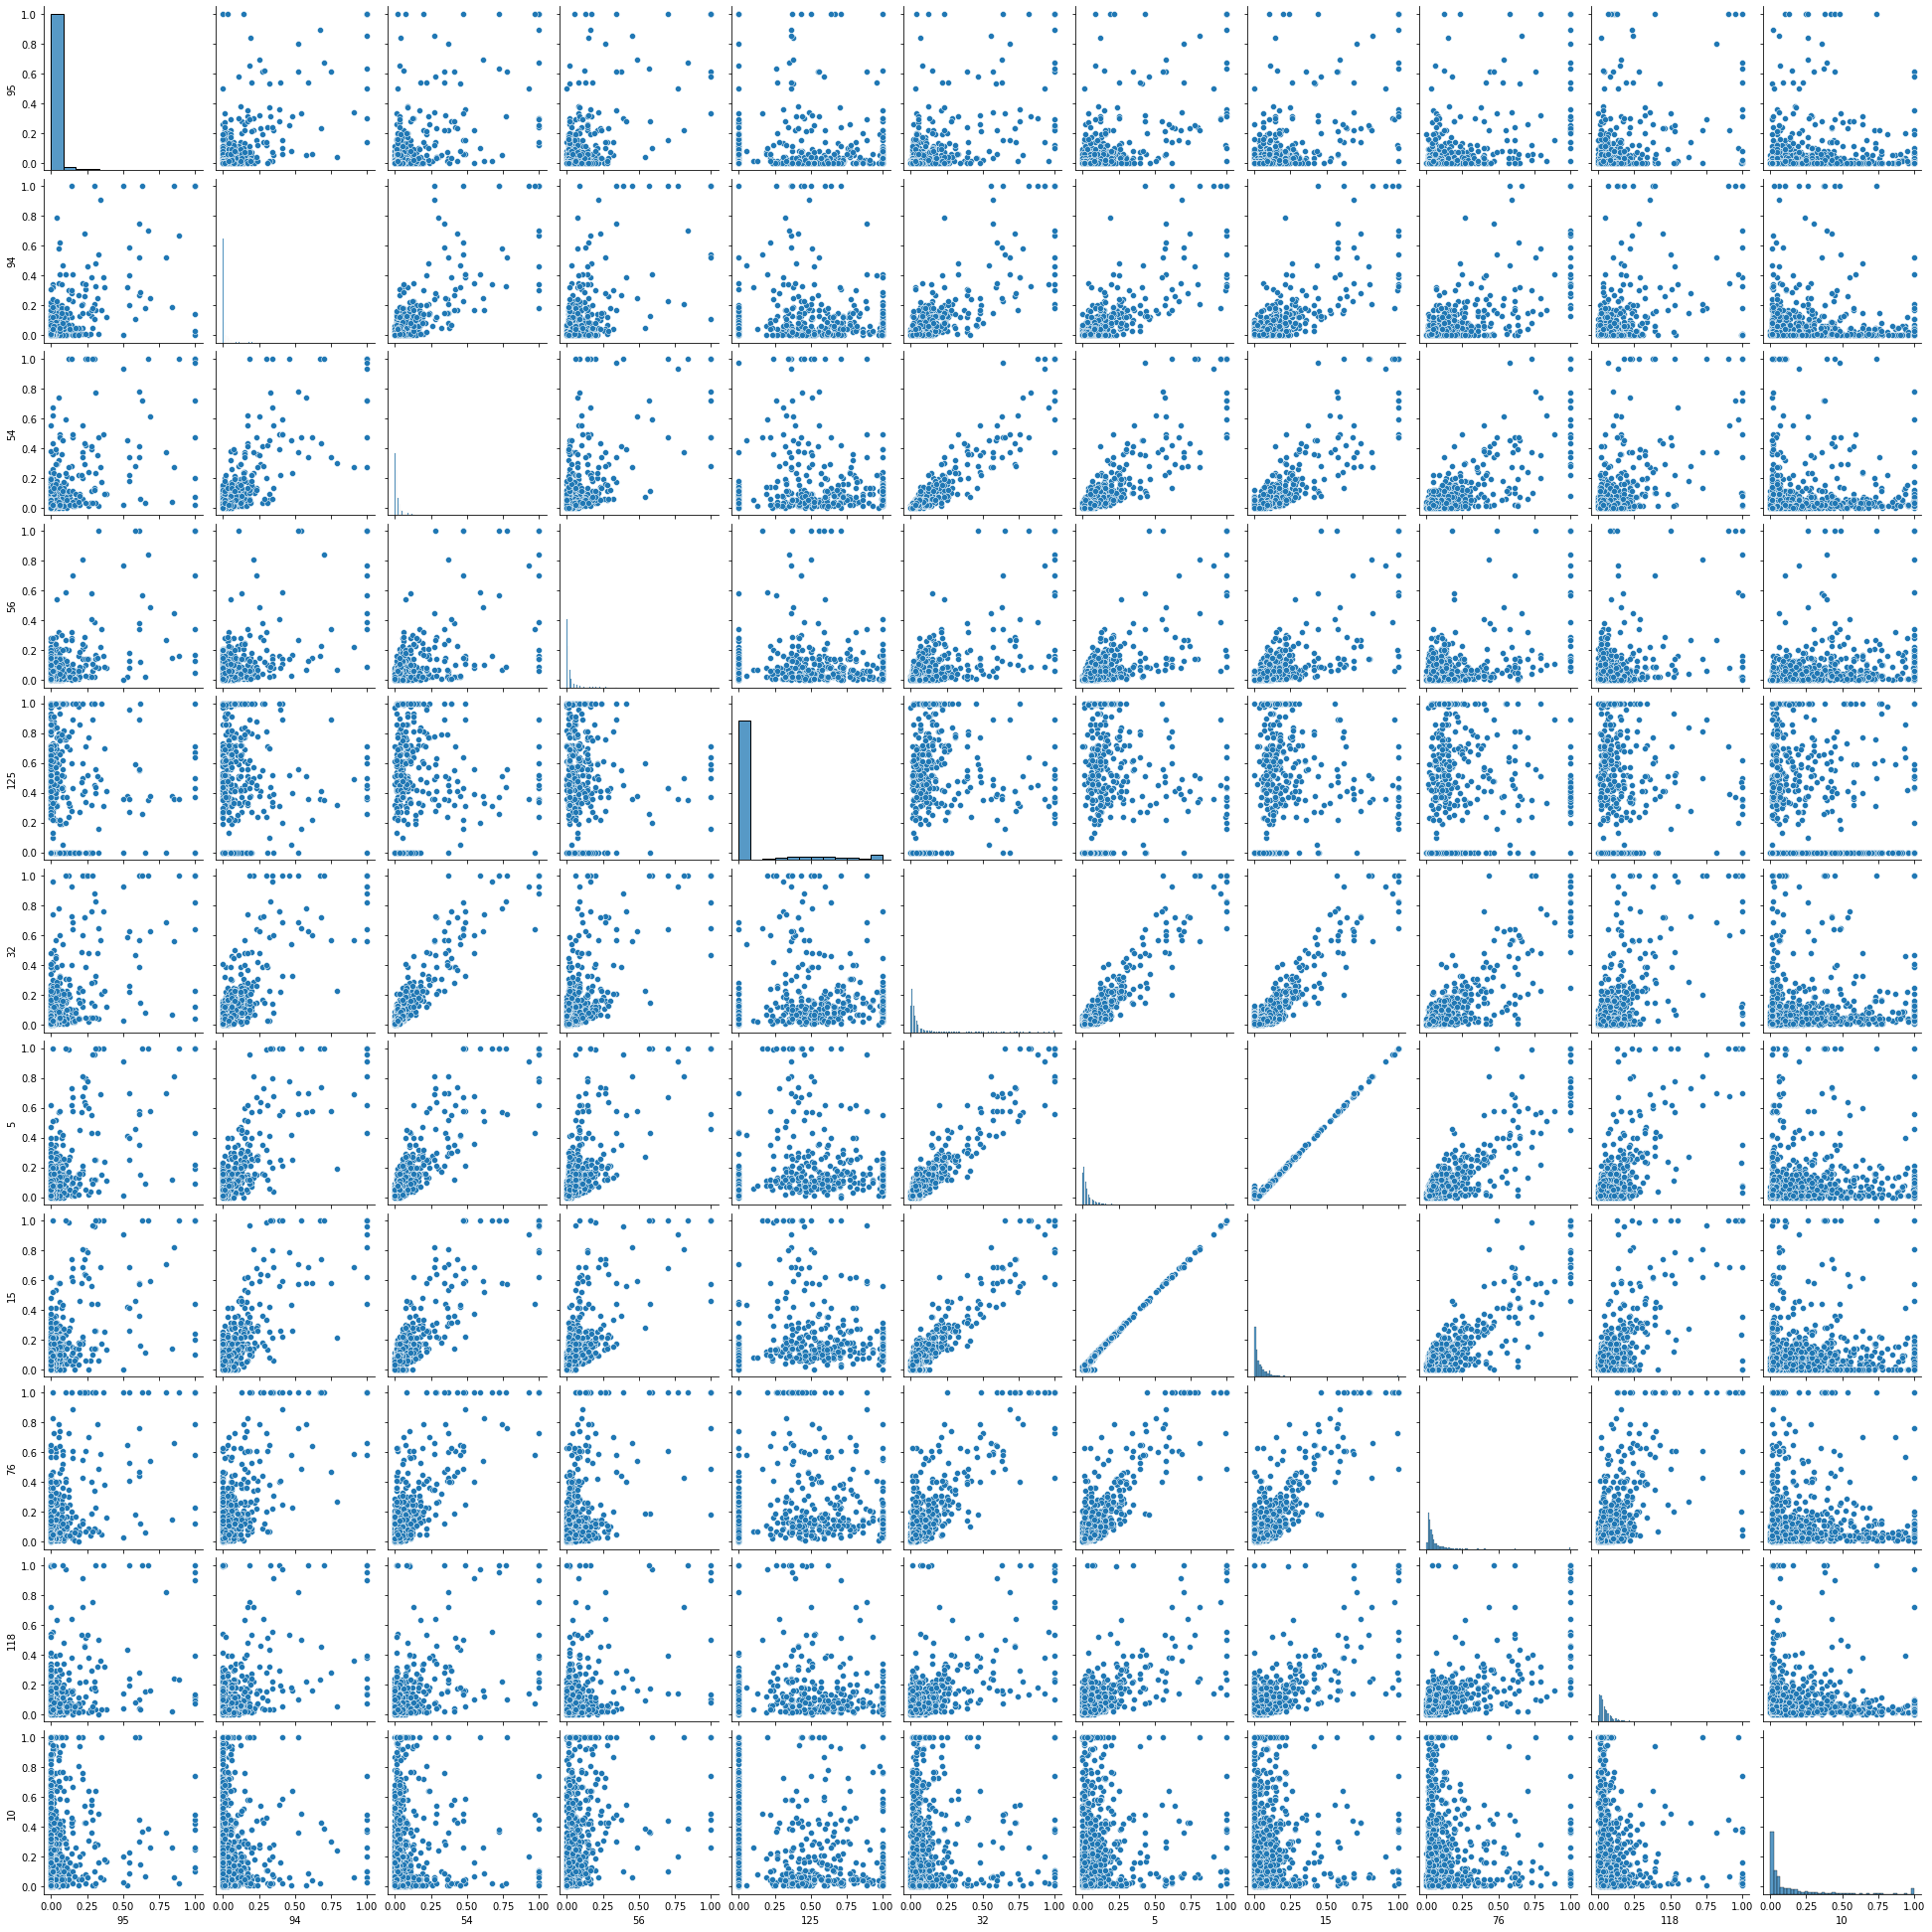

In [15]:
sns.pairplot(df2[highest11CV.index])

<AxesSubplot:title={'center':'Selected Top 11 Coefficient of Variation Columns'}>

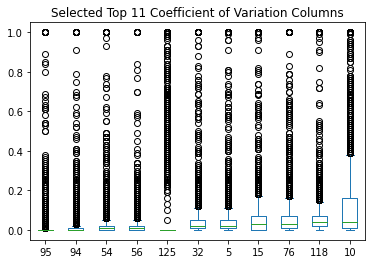

In [16]:
# https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4
# https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# plt.subplots()
# plt.title('Selected 11 Columns')
# plt.xlabel(selcol)
# plt.boxplot(df2[highest11CV.index])
df2[highest11CV.index].plot(kind='box',title='Selected Top 11 Coefficient of Variation Columns')


(f) Fit a linear model using least squares to the training set and report the test error.

In [17]:
X_train = X.iloc[:,:122]
y_train = X.iloc[:,122] 
X_test = y.iloc[:,:122]
y_test = y.iloc[:,122] 
reg = linear_model.LinearRegression().fit(X_train,y_train)
pred = reg.predict(X_test)
mseLR = mean_squared_error(y_test, pred)
print("MSE of Linear Regression: ", mseLR)

MSE of Linear Regression:  0.7913112944382305


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV.score
ridge_clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
ridge_alpha = ridge_clf.alpha_
print("Best Lambda: ", ridge_alpha)
ridge_clf = RidgeCV(alphas=[ridge_alpha]).fit(X_train, y_train)
pred_ridge = ridge_clf.predict(X_test)
mseRidge = mean_squared_error(y_test, pred_ridge)
print("MSE of Ridge Regression: ", mseRidge)
print("Score: ", ridge_clf.score(X_test,y_test))

Best Lambda:  1.0
MSE of Ridge Regression:  0.017771495868759233
Score:  0.6268562220958648


/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them. (In this data set, features are already normalized.)

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lesso_clf = LassoCV(cv=5,random_state=0).fit(X_train,y_train)
var = lesso_clf.coef_
pred_lasso = lesso_clf.predict(X_test)
mseLasso = mean_squared_error(y_test, pred_lasso)
print("MSE of Lasso regression: ", mseLasso)
print("Score: ", reg.score(X_test,y_test))
print("The variables selected:\n", var)

MSE of Lasso regression:  0.01779134404295623
Score:  -15.614970854758337
The variables selected:
 [-0.          0.          0.27198908 -0.         -0.01548918  0.
  0.06630688 -0.26500756  0.          0.         -0.          0.04051855
  0.         -0.08474297  0.02656375 -0.09830653  0.04857451  0.0388039
 -0.10843719  0.         -0.         -0.05768278 -0.0211048  -0.03112233
  0.02901416  0.02271089  0.02393703 -0.         -0.14123178 -0.01816706
  0.          0.         -0.          0.13734735 -0.01577999  0.
  0.0102302   0.          0.11814669  0.13327799 -0.07847576 -0.
  0.         -0.         -0.196488   -0.03777154 -0.0101547   0.
 -0.12951339 -0.05737898  0.09843297 -0.06989643 -0.         -0.
 -0.         -0.00505088 -0.          0.          0.          0.03749658
  0.         -0.07106883 -0.         -0.06497544  0.04226671 -0.
 -0.         -0.05733568  0.21920734  0.05711974  0.00351135  0.12440176
 -0.0603639   0.          0.07355632 -0.05992484 -0.01588445  0.02419749
 

/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009758886348475215, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010114728776748905, tolerance: 0.006746416078595318
  model = cd_fast.enet_coordinate_descent_gram(


In [20]:
# https://www.askpython.com/python/examples/standardize-data-in-python
# Standardize features with scale() function
X_train_s = scale(X.iloc[:,:122])
y_train_s = scale(X.iloc[:,122])
X_test_s = scale(y.iloc[:,:122])
y_test_s = scale(y.iloc[:,122])

lesso_clf = LassoCV(cv=5,random_state=0).fit(X_train_s,y_train_s)
var = lesso_clf.coef_
pred_lasso = lesso_clf.predict(X_test_s)
mseLasso_std = mean_squared_error(y_test_s, pred_lasso)
print("MSE of Lasso regression with standardized: ", mseLasso_std)

MSE of Lasso regression with standardized:  0.3693504035837038


/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17513945867472103, tolerance: 0.11948332925665033
  model = cd_fast.enet_coordinate_descent_gram(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1818414581110801, tolerance: 0.11948332925665033
  model = cd_fast.enet_coordinate_descent_gram(
/Users/melissayu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17780217271945276, tolerance: 0.11948332925665033
  model = cd_fast.enet_coordinate_descent_gram(
/Users/melissayu/opt/anaconda3/lib/

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# We need to Cross Validation on each sample
best_score = 0
best_pca = None
for i in np.arange(1,123):
    pca = PCA(n_components = i).fit(X_train)
    score = cross_val_score(estimator = linear_model.LinearRegression(), X = pca.fit_transform(X_train), y = y_train).mean()
    if score > best_score:
        best_score = score
        best_pca = pca
print('Best score: ', best_score)
print('Best PCA component number: ', best_pca)


pca = PCA(n_components = 96)
X_train_PCA = pca.fit_transform(X_train_s)
X_test_PCA = pca.fit_transform(X_test_s)
# convert to nparray
y_train = np.array(y_train)
y_test = np.array(y_test)
reg = linear_model.LinearRegression().fit(X_train_PCA,y_train)
pred_PCR = reg.predict(X_test_PCA)
msePCR = mean_squared_error(y_test, pred_PCR)
print("MSE for M = 96 components ", msePCR)

Best score:  0.6565266308445947
Best PCA component number:  PCA(n_components=96)
MSE for M = 96 components  0.04674612813116936


(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost(5) to fit the model tree. Determine α (the regularization term) using cross-validation. <br>5 - Some hints on installing XGBoost on Windows: http://www.picnet.com.au/blogs/guido/2016/09/22/xgboost-windows-x64-binaries-for-download/.

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html
from xgboost import XGBRegressor
lambdas=[0.01, 0.1, 0.5, 1, 2, 4, 5, 10]
parameters = {}
parameters['reg_alpha'] = lambdas     # add it into dict
# create model 
clf = XGBRegressor()
# Using GridSearchCV - Cross Validation to find the best alpha
gridCV = GridSearchCV(clf, param_grid = parameters).fit(X_train,y_train)
bestClassTree = gridCV.best_params_
print('Best alpha:', bestClassTree['reg_alpha'])

# reg_alpha (Optional[float]) – L1 regularization term on weights (xgb’s alpha)
# create regression model and using the best alpha from GridSearchCV
xgb = XGBRegressor(reg_alpha = bestClassTree['reg_alpha']).fit(X_train,y_train)
pred_xgb = xgb.predict(X_test)
mseXGB = mean_squared_error(y_test, pred_xgb)
print('MSE of L1 regularization: ', mseXGB)


Best alpha: 4
MSE of L1 regularization:  0.018026571479964063
